**최대한 이론 강의 시간에 배웠던 함수들을 사용하여 풀기!** + seaborn 내용도 나오니 seaborn_기본.ipynb 숙지한 후 풀기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 타이타닉 데이터 로드
ti = sns.load_dataset('titanic') 
ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# ti가 몇개의 행과 열로 구성된 데이터프레임인지 확인
ti.shape

(891, 15)

In [4]:
# ti의 맨 앞 2개의 row만 확인 & ti의 맨 뒤 2개의 row만 확인
display(ti.head(2), ti.tail(2))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
# ti의 컬럼명들을 확인
ti.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
# ti의 각 변수들의 non-null 데이터 개수와 type 파악하기 
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# ti 변수들 중 numeric(숫자형) 변수들의 분포 특성 파악
ti.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---

In [8]:
# ti에서 survived, sex ,age, fare, class, who column애 해당하는 데이터만 뽑아서 df 변수에 할당
df = ti[['survived','sex','age','fare','class','who']]
# df의 행과 열 크기 출력
print(df.shape)
# df의 맨 앞 2개의 행만 보기
df.head(2)

(891, 6)


,survived,sex,age,fare,class,who
0,0,male,22.0,7.2500,Third,man
1,1,female,38.0,71.2833,First,woman


In [9]:
# 간단하게 survived의 각 변수별 데이터의 수 확인. 산 사람(1)은 몇명이고 죽은 사람(0)은 몇명인가
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

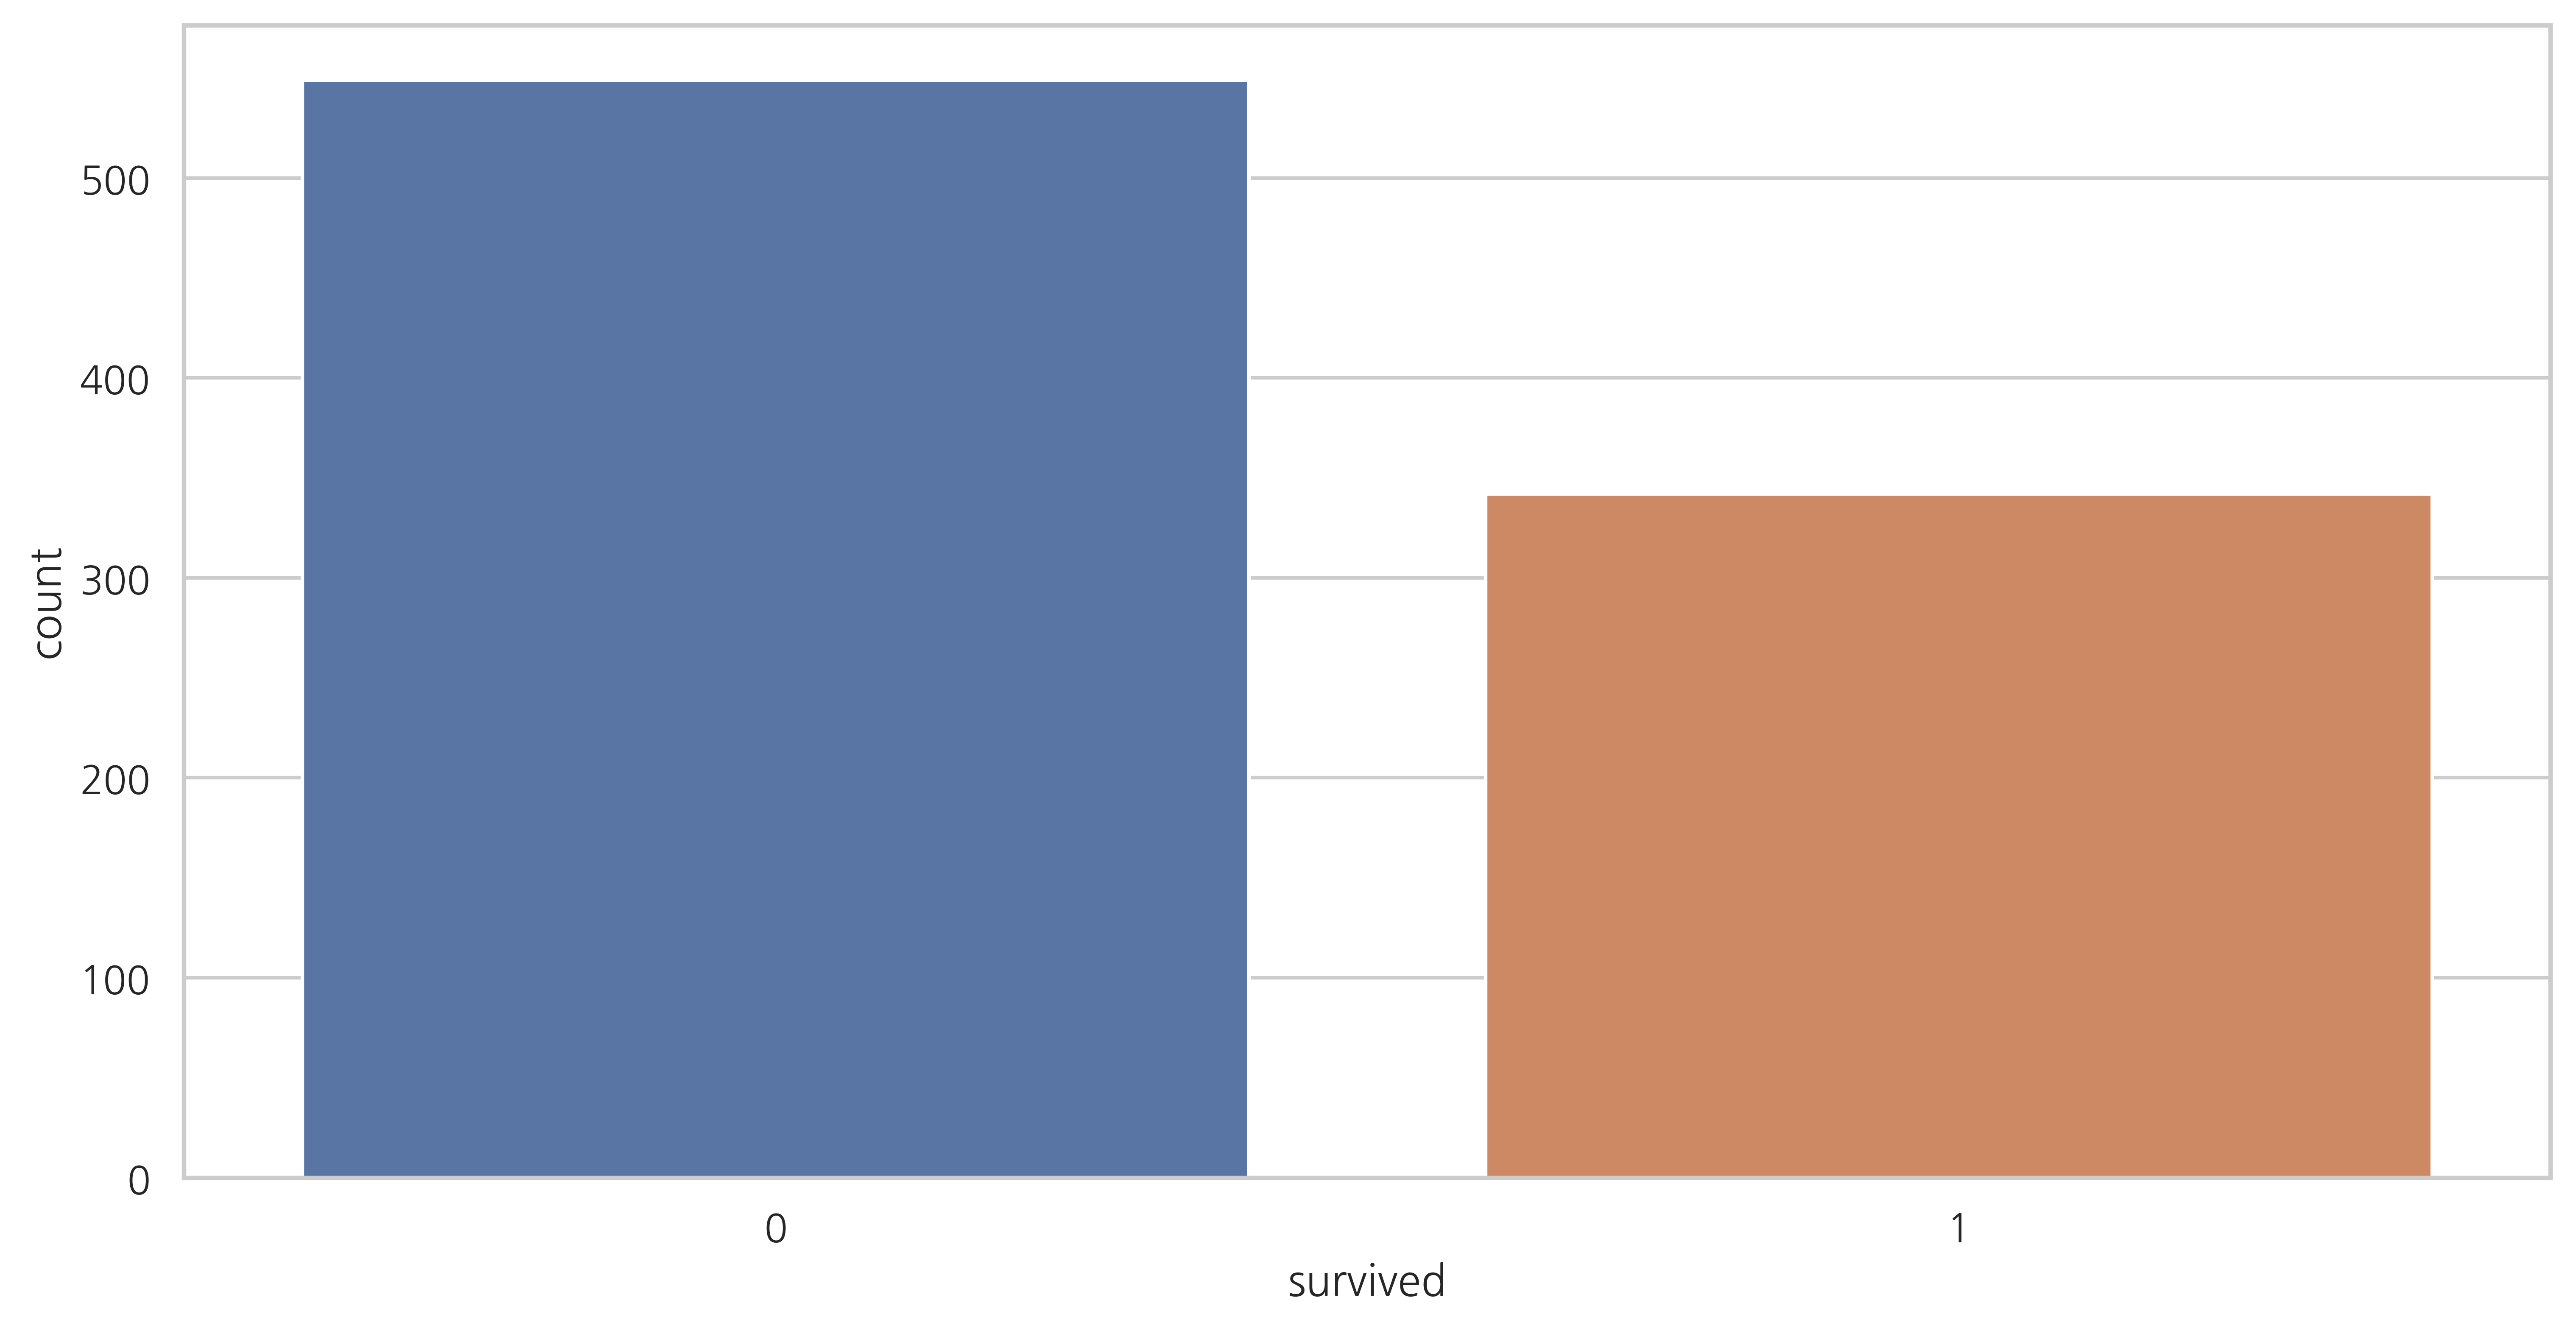

In [10]:
# survived별 사람의 수 count하여 시각화 (seaborn 사용)
sns.countplot(df.survived) # sns.countplot(x='survived', data=df)

In [11]:
# who 변수의 unique한 데이터 확인 및 출력
print(df['who'].unique()) 
# class 변수의 unique한 데이터 확인 및 출력
print(df['class'].unique())

['man' 'woman' 'child']
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']


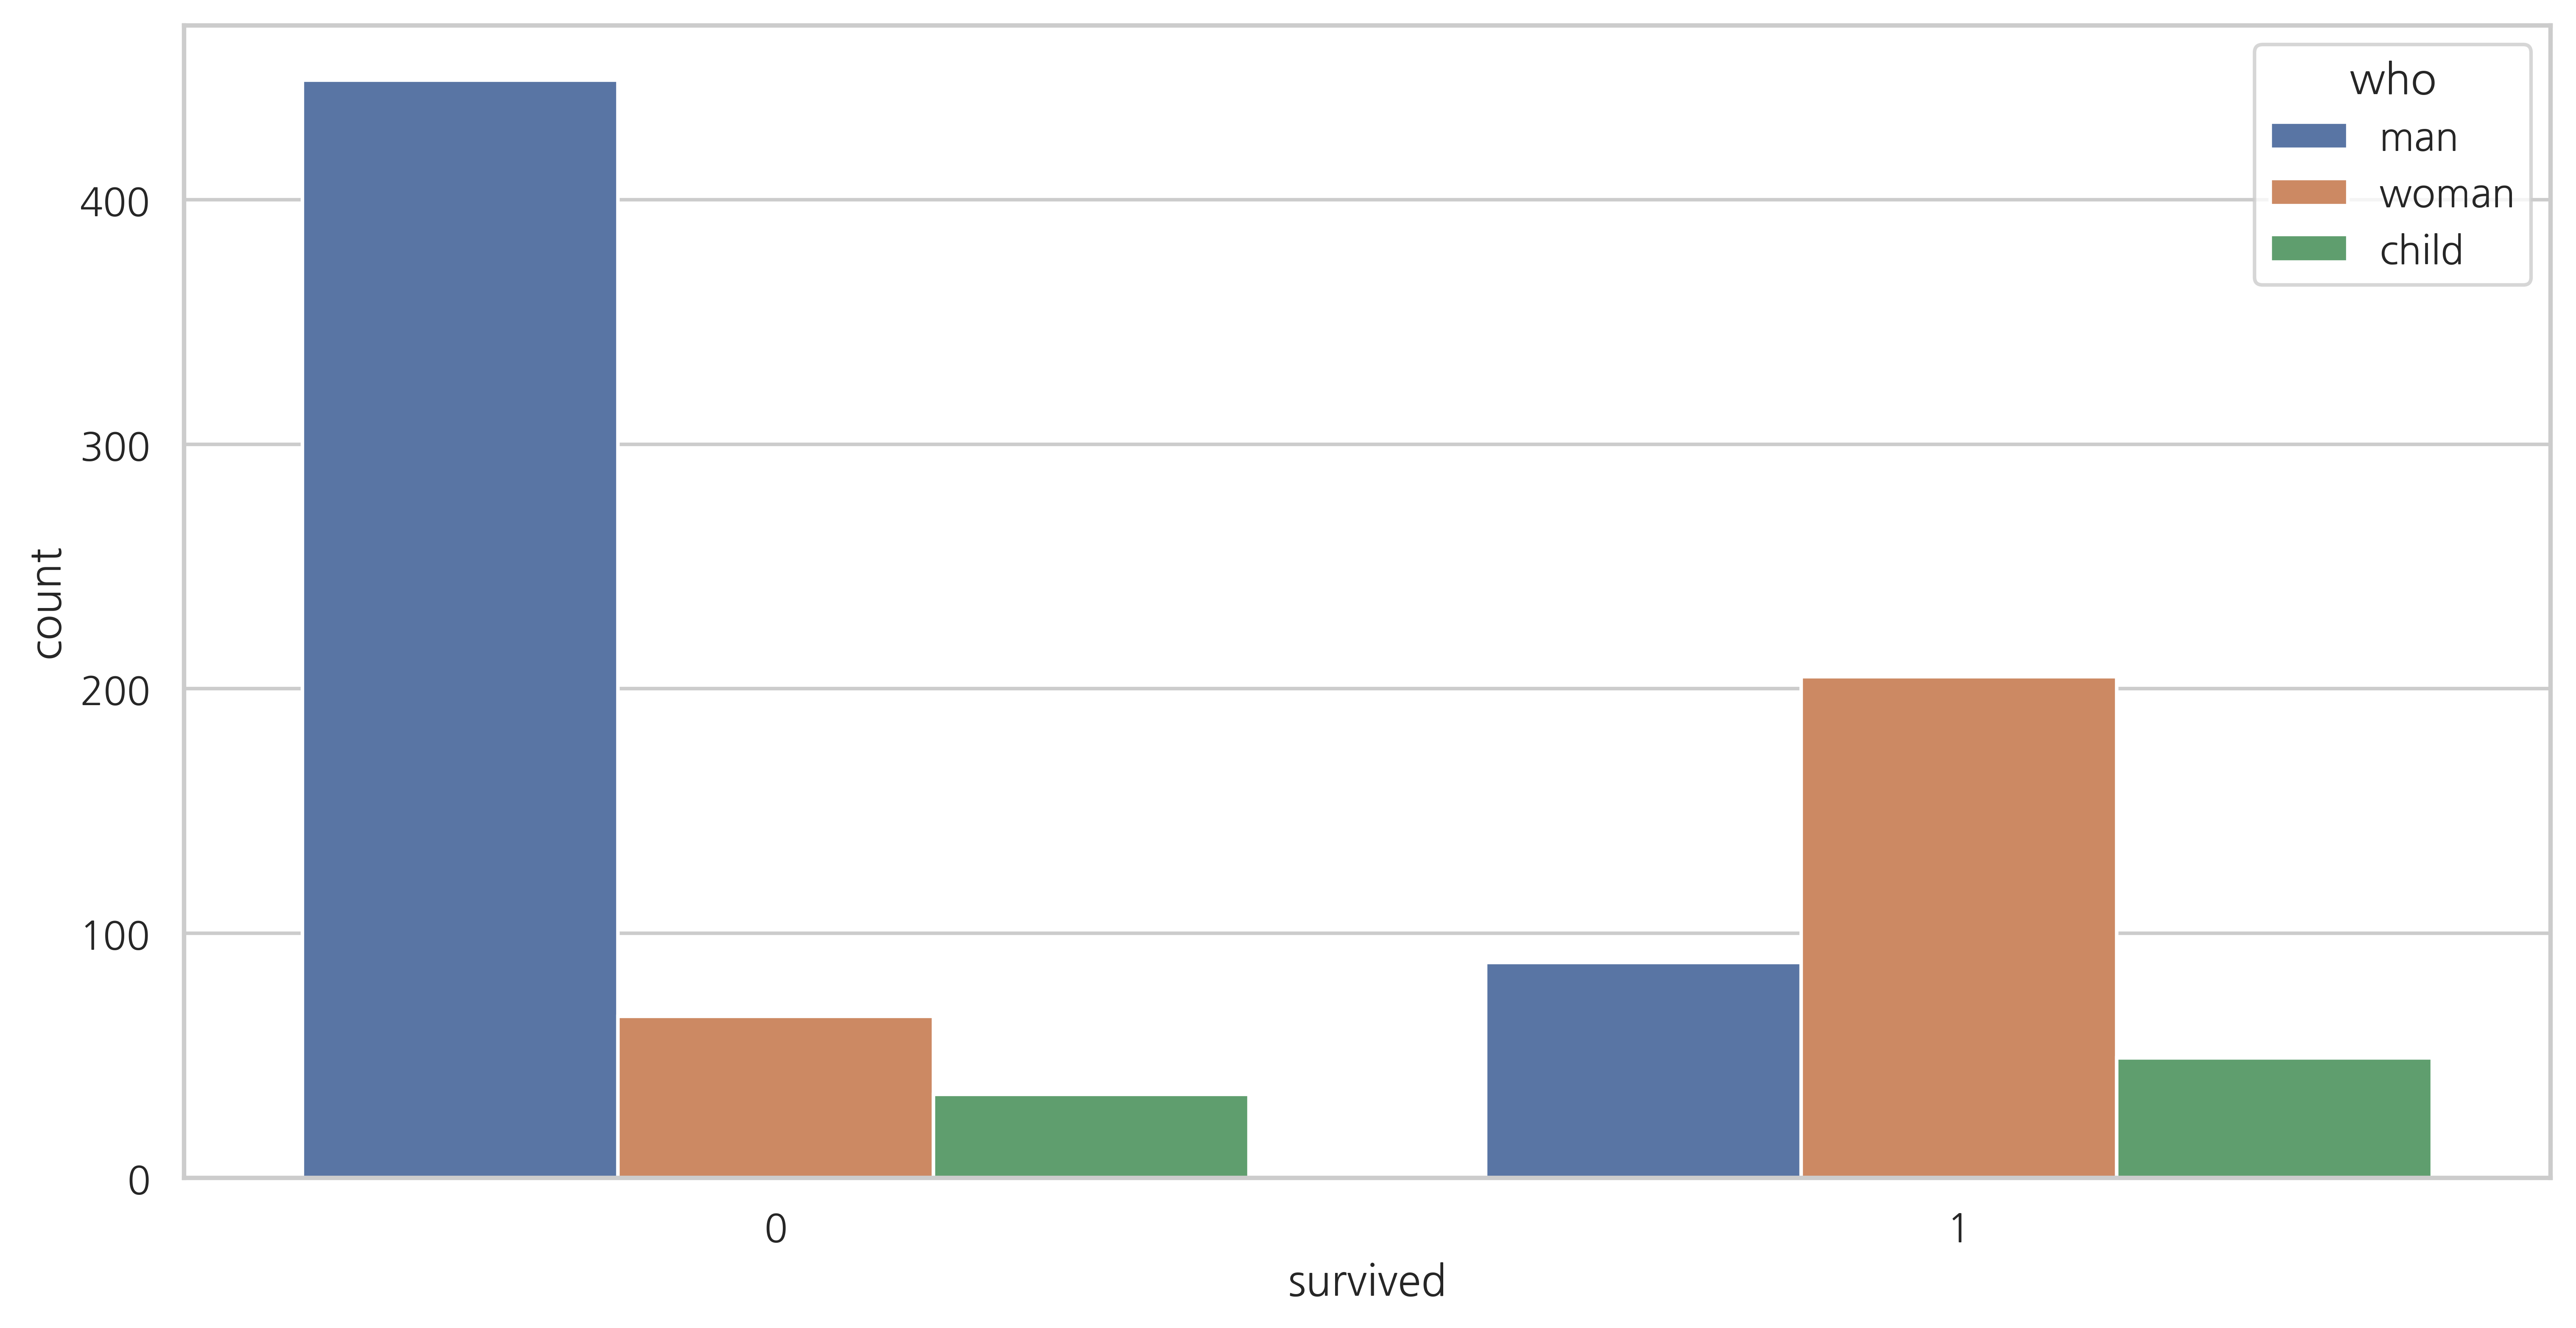

In [12]:
# who(hue) 변수별로 survived(x)한 사람의 수를 count하여 시각화 (seaborn 사용) 
sns.countplot(x='survived', data=df, hue='who')

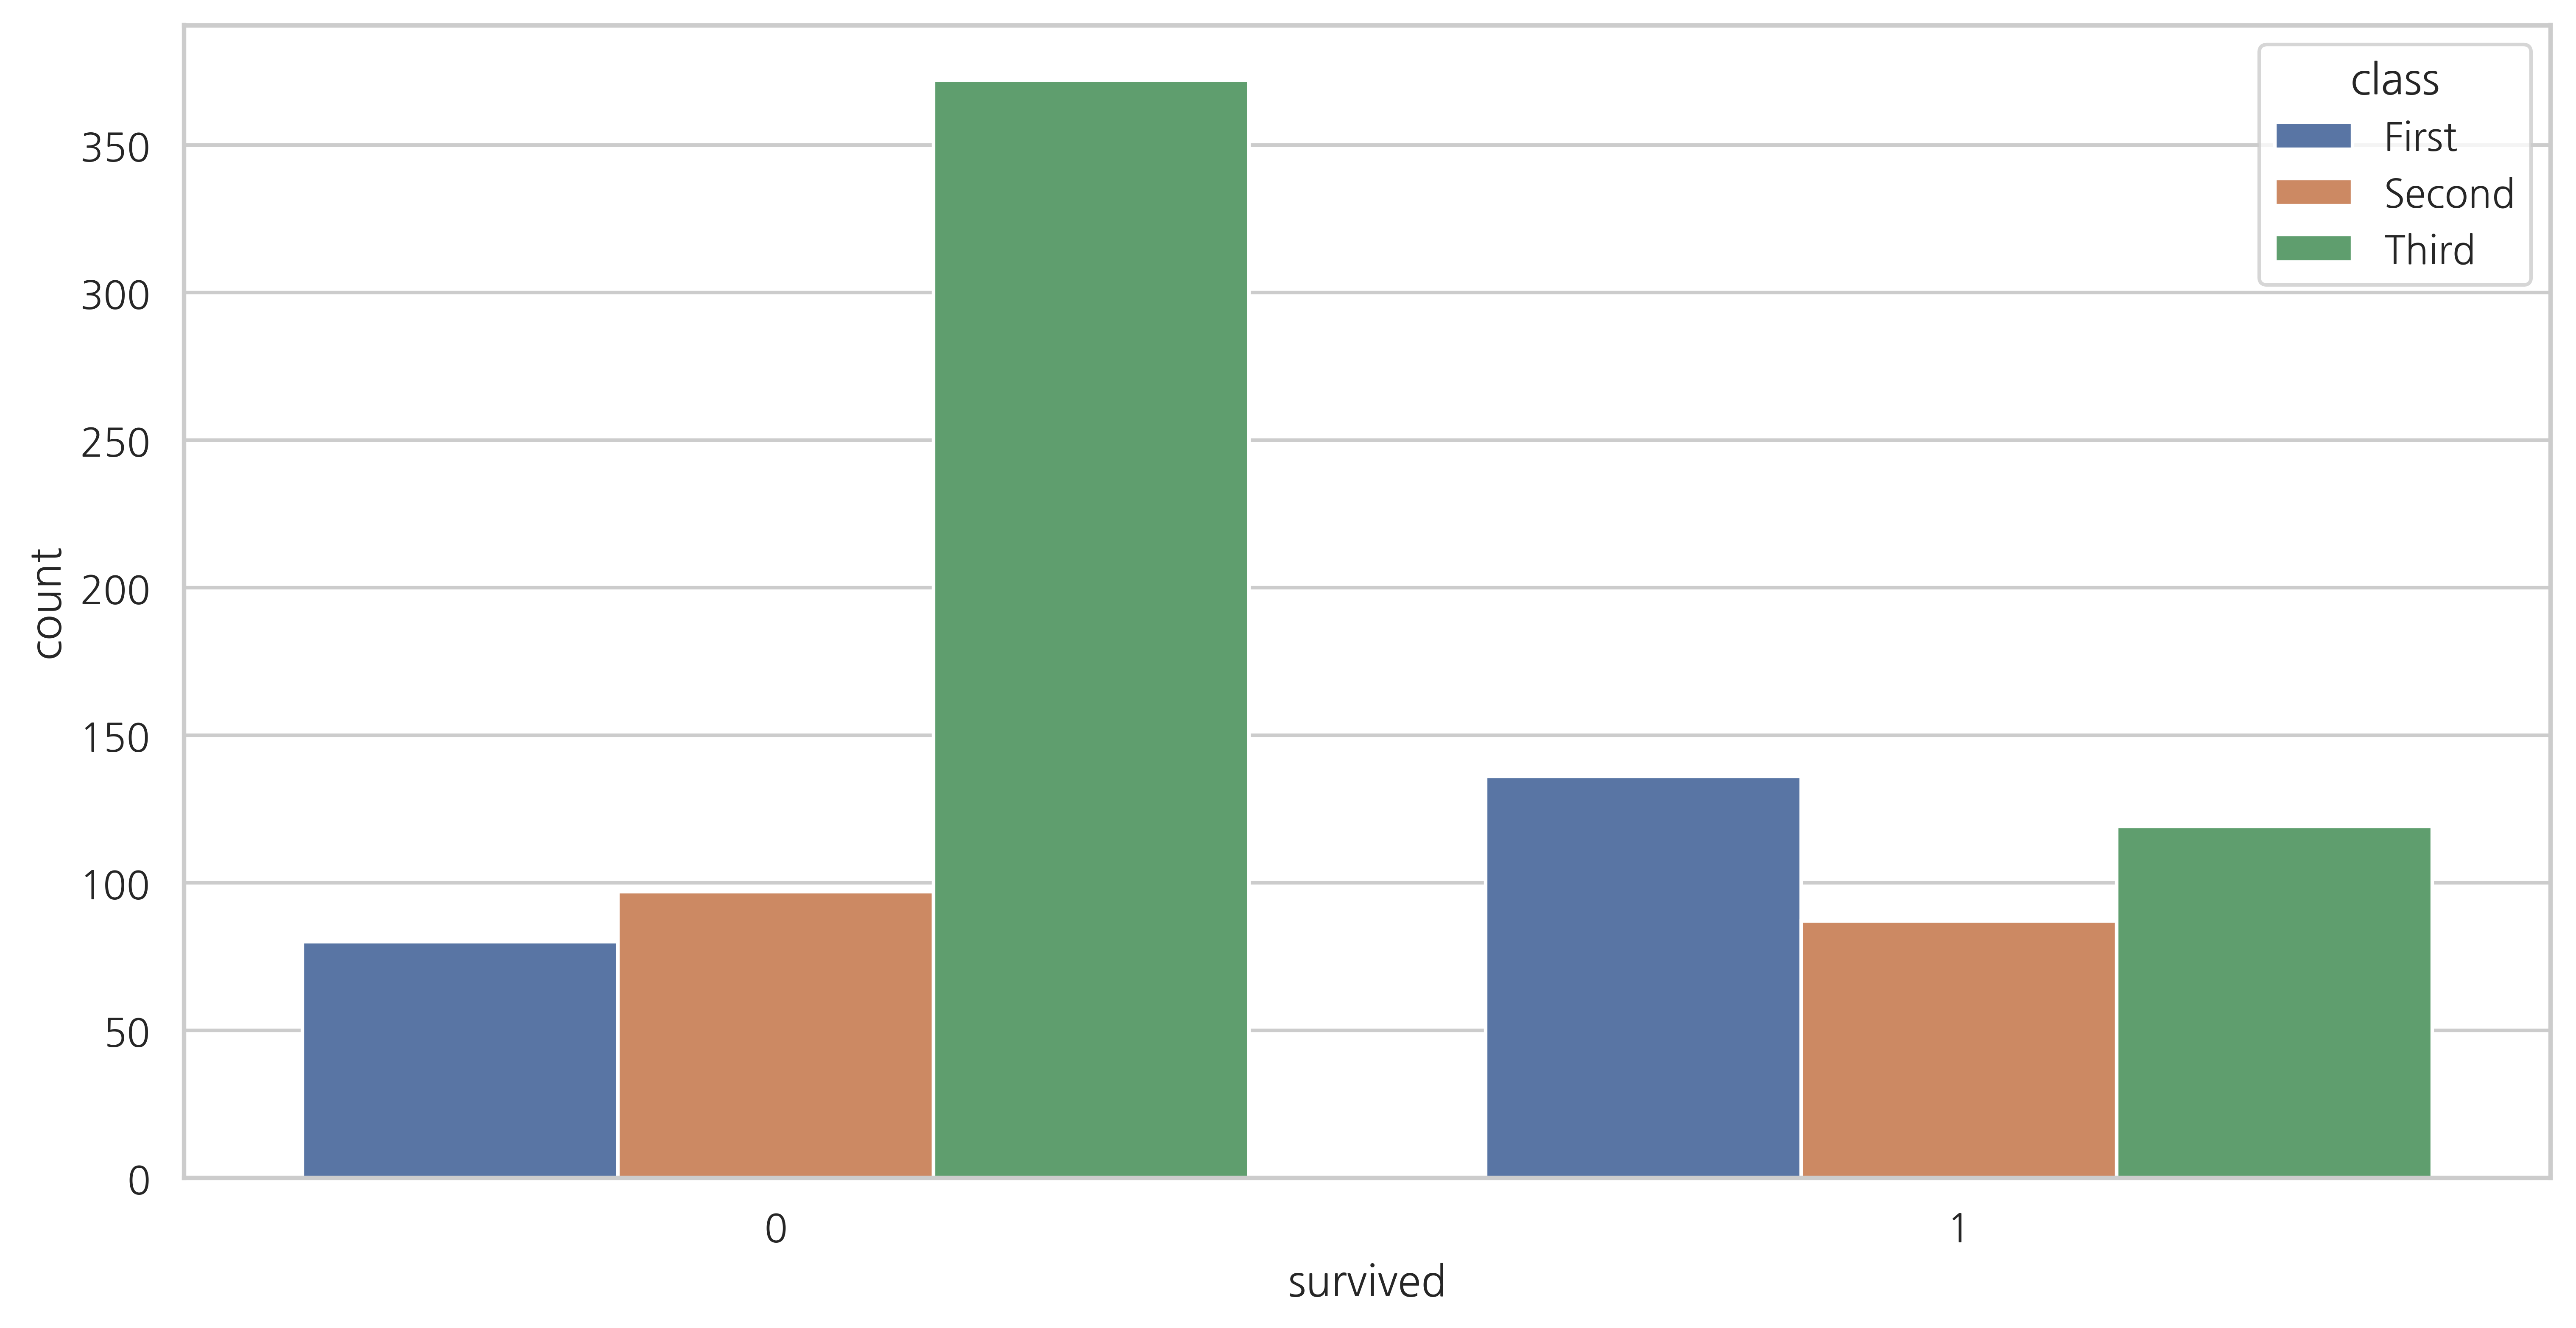

In [13]:
# class 변수별로 survived한 사람의 수를 count하여 시각화 (seaborn 사용) 
sns.countplot(x='survived', data=df, hue='class')

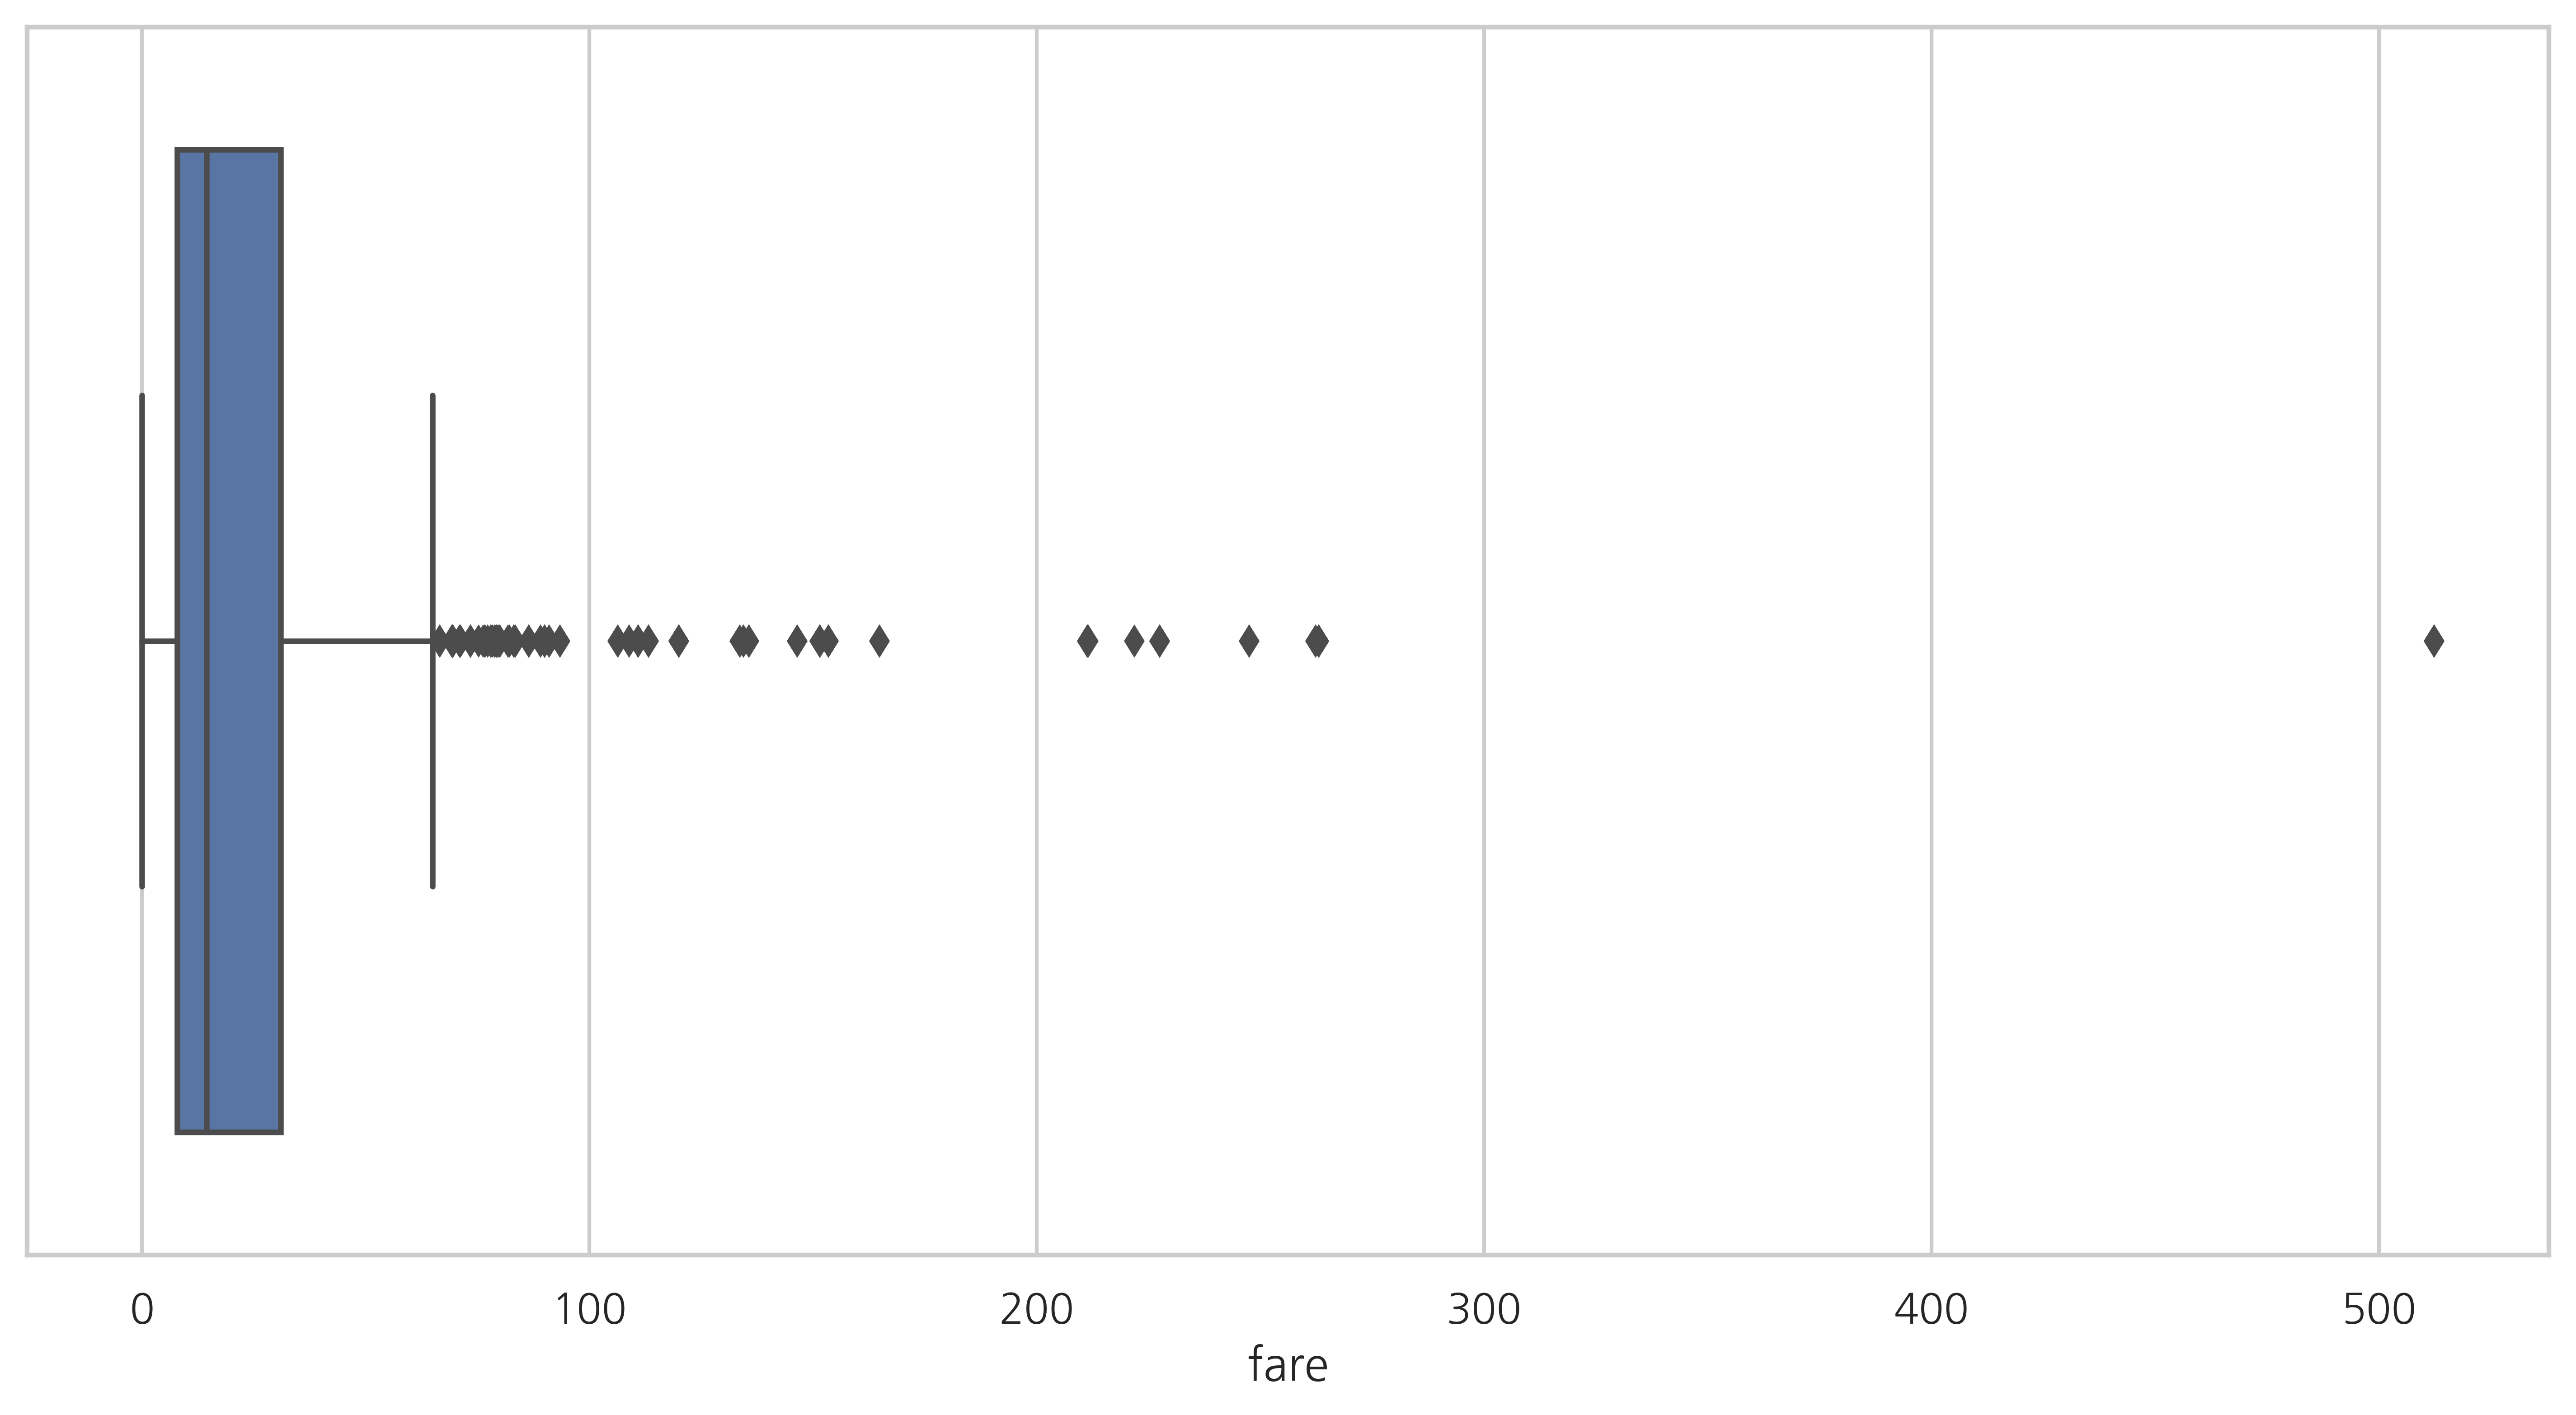

In [14]:
# class 변수별 fare값의 분포를 boxplot으로 시각화 (seaborn 사용) 
sns.boxplot(x="fare",hue='who',data=df) 

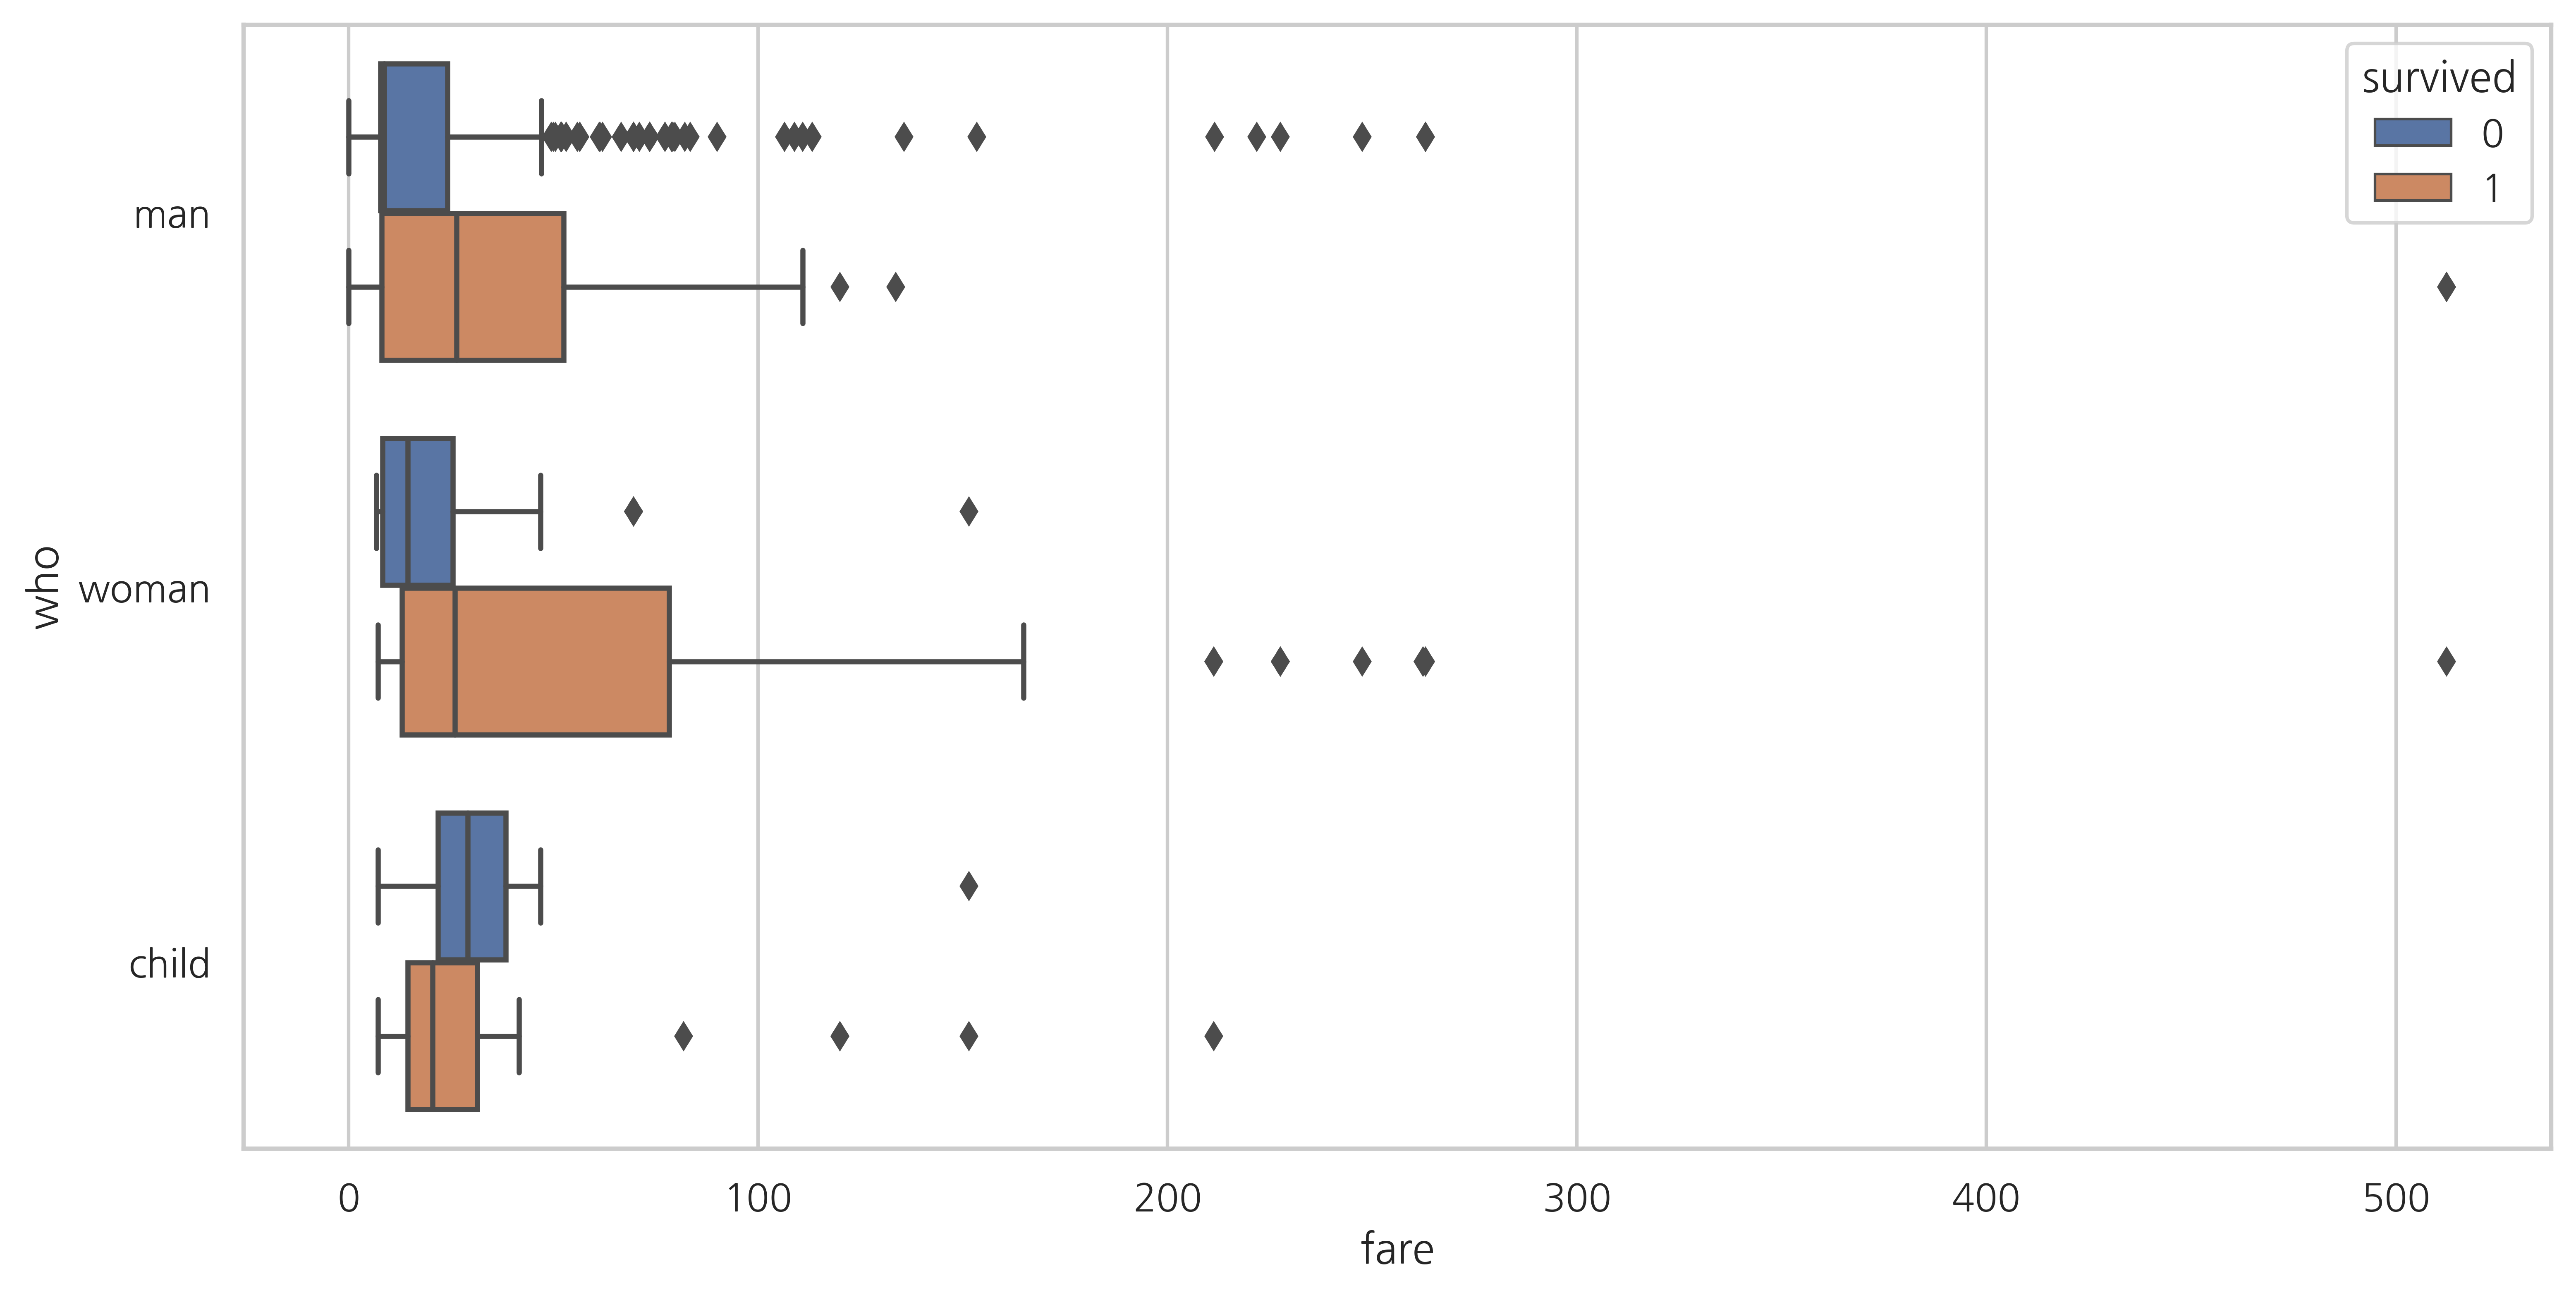

In [15]:
# who 변수(x)별 fare값의 분포(y)를 boxplot으로 시각화. 이떄 who변수별로 survived(hue)에 해당하는 두개의 boxplot이 생성되게 (seaborn 사용) 
sns.boxplot(y='who', x='fare', hue='survived',data=df)

In [16]:
# df에서 who 중 child(어린아이들)에 해당하는 데이터만 뽑은 후, 뽑은 데이터를 child_df라고 설정 
child_df = df[df['who'] == 'child']
# child_df의 행과 열 크기 확인
child_df.shape

(83, 6)

In [17]:
# child_df 자체의 인덱스 재정렬 진행.(reset_index 함수 사용. 이때 index 열은 추가 X)
child_df.reset_index(drop=True, inplace=True)
# child_df의 앞의 3개 행만 확인
child_df.head(3)

,survived,sex,age,fare,class,who
0,0,male,2.0,21.0750,Third,child
1,1,female,14.0,30.0708,Second,child
2,1,female,4.0,16.7000,Third,child


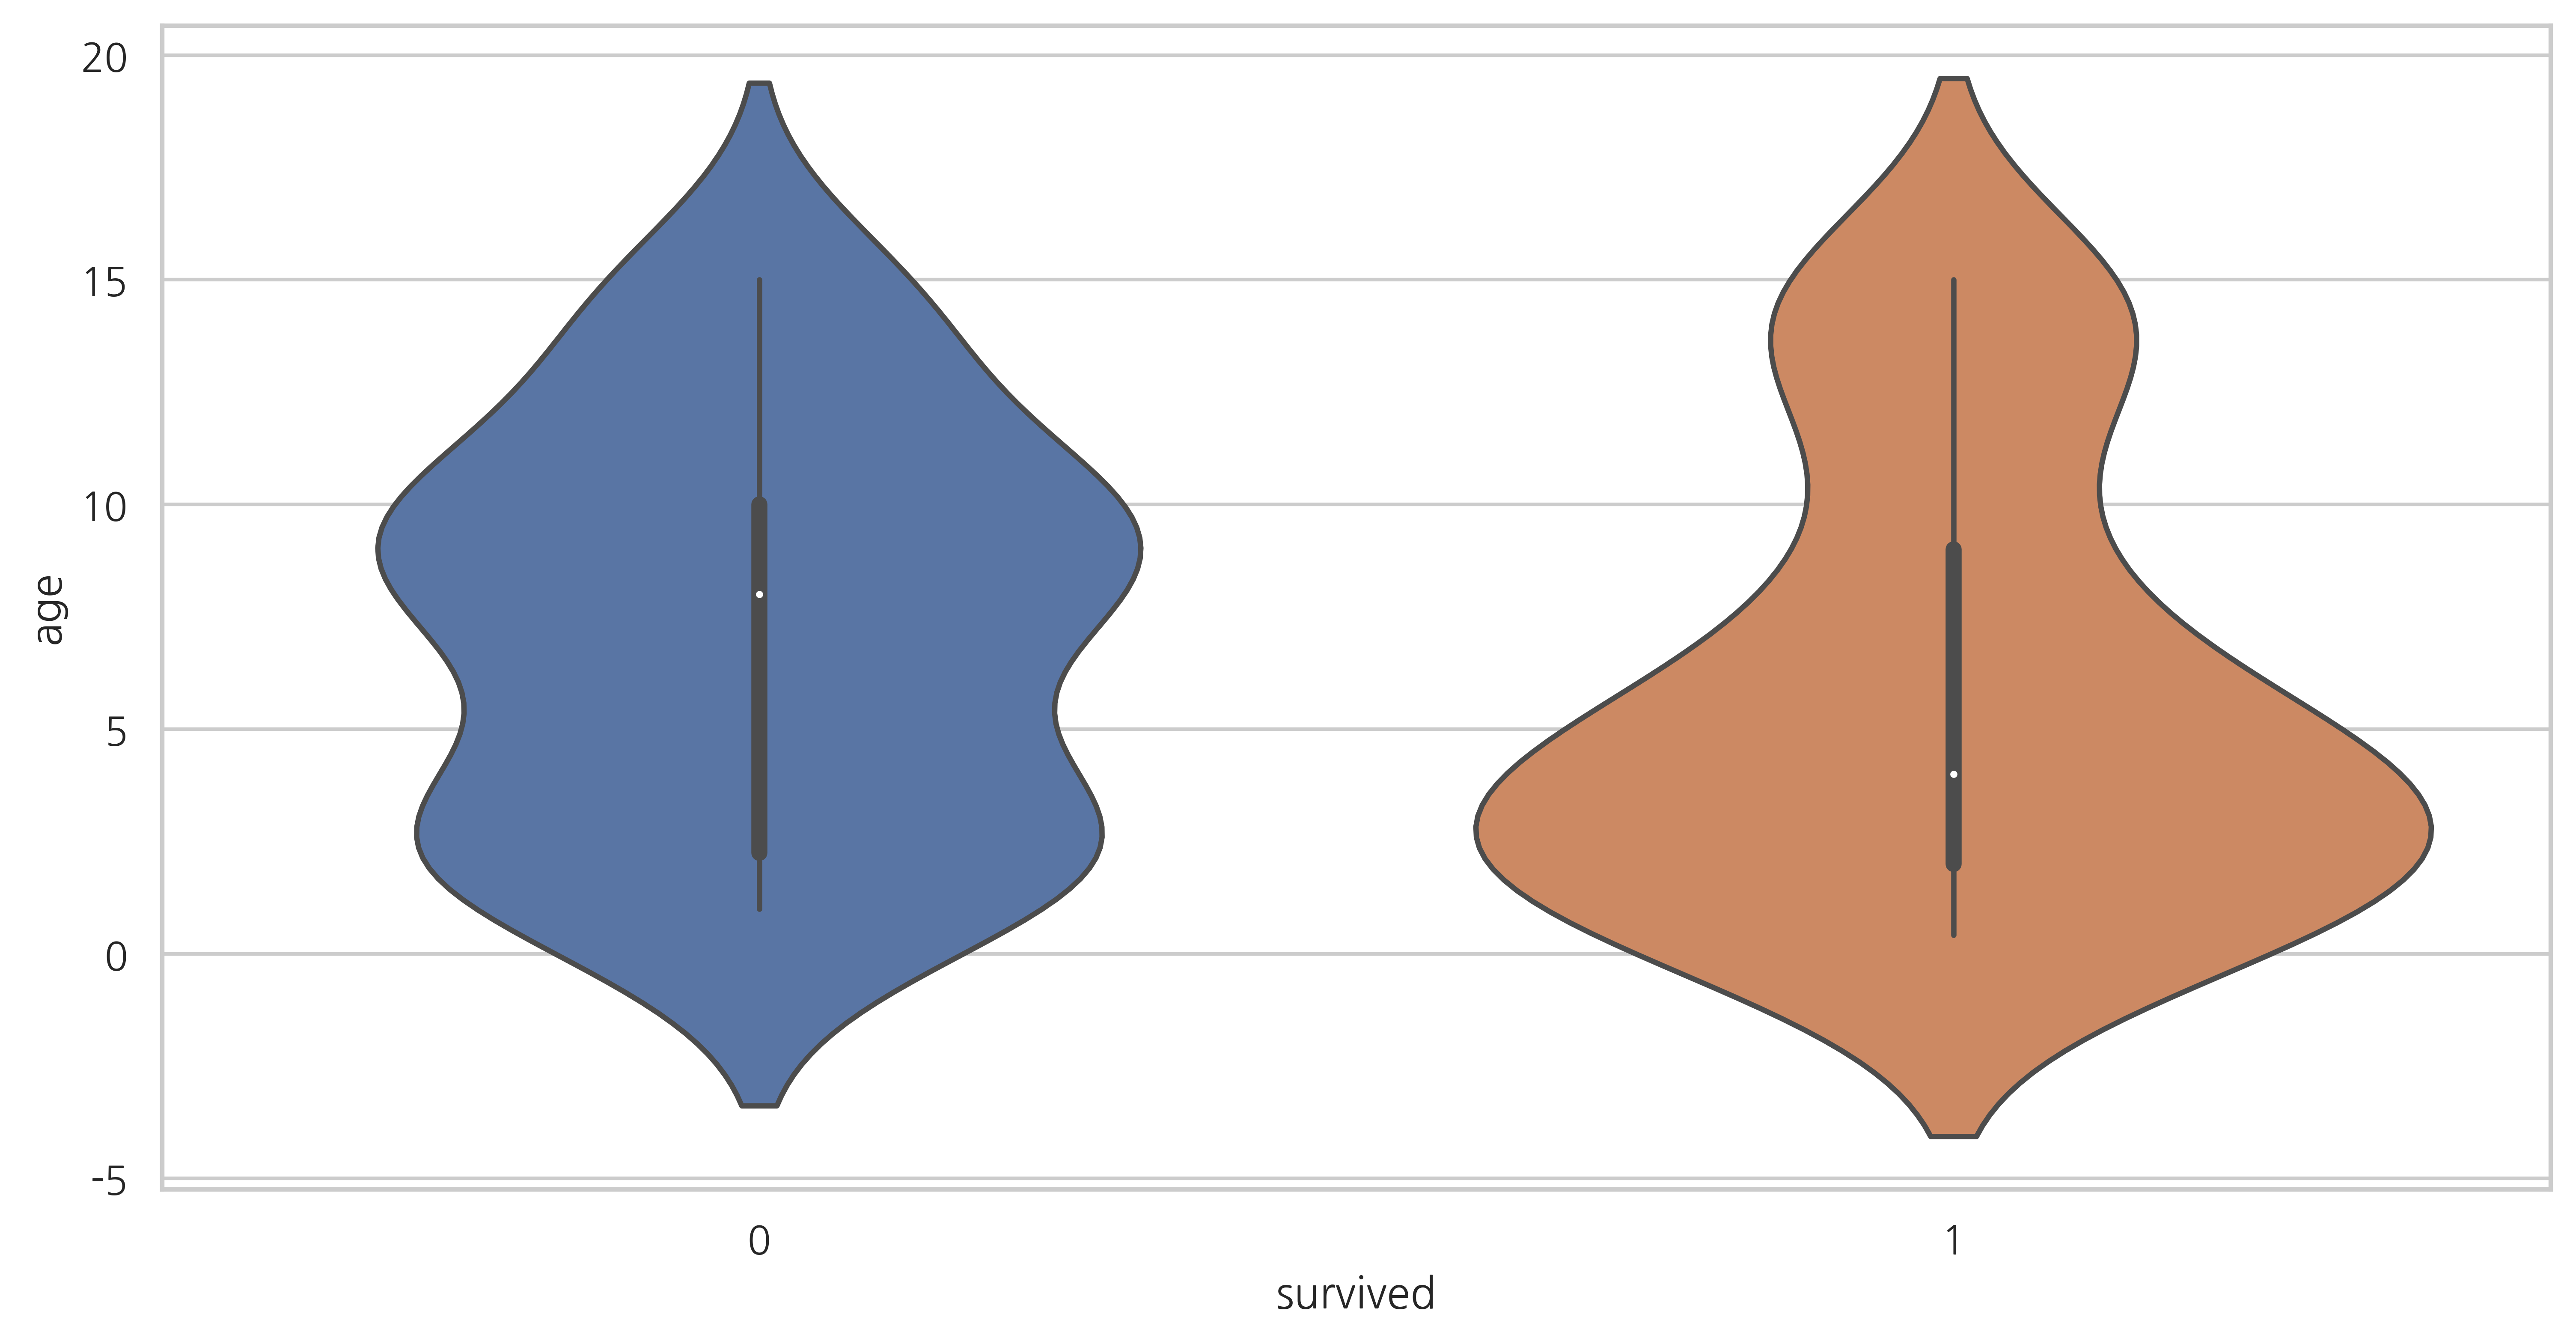

In [18]:
# child_df에서 survived별 age를 violinplot으로 나타냄 (seaborn 사용. violinplot 사용법 및 내용은 구글링으로 검색!ㅎㅎ)
sns.violinplot(data=child_df,x='survived',y='age')

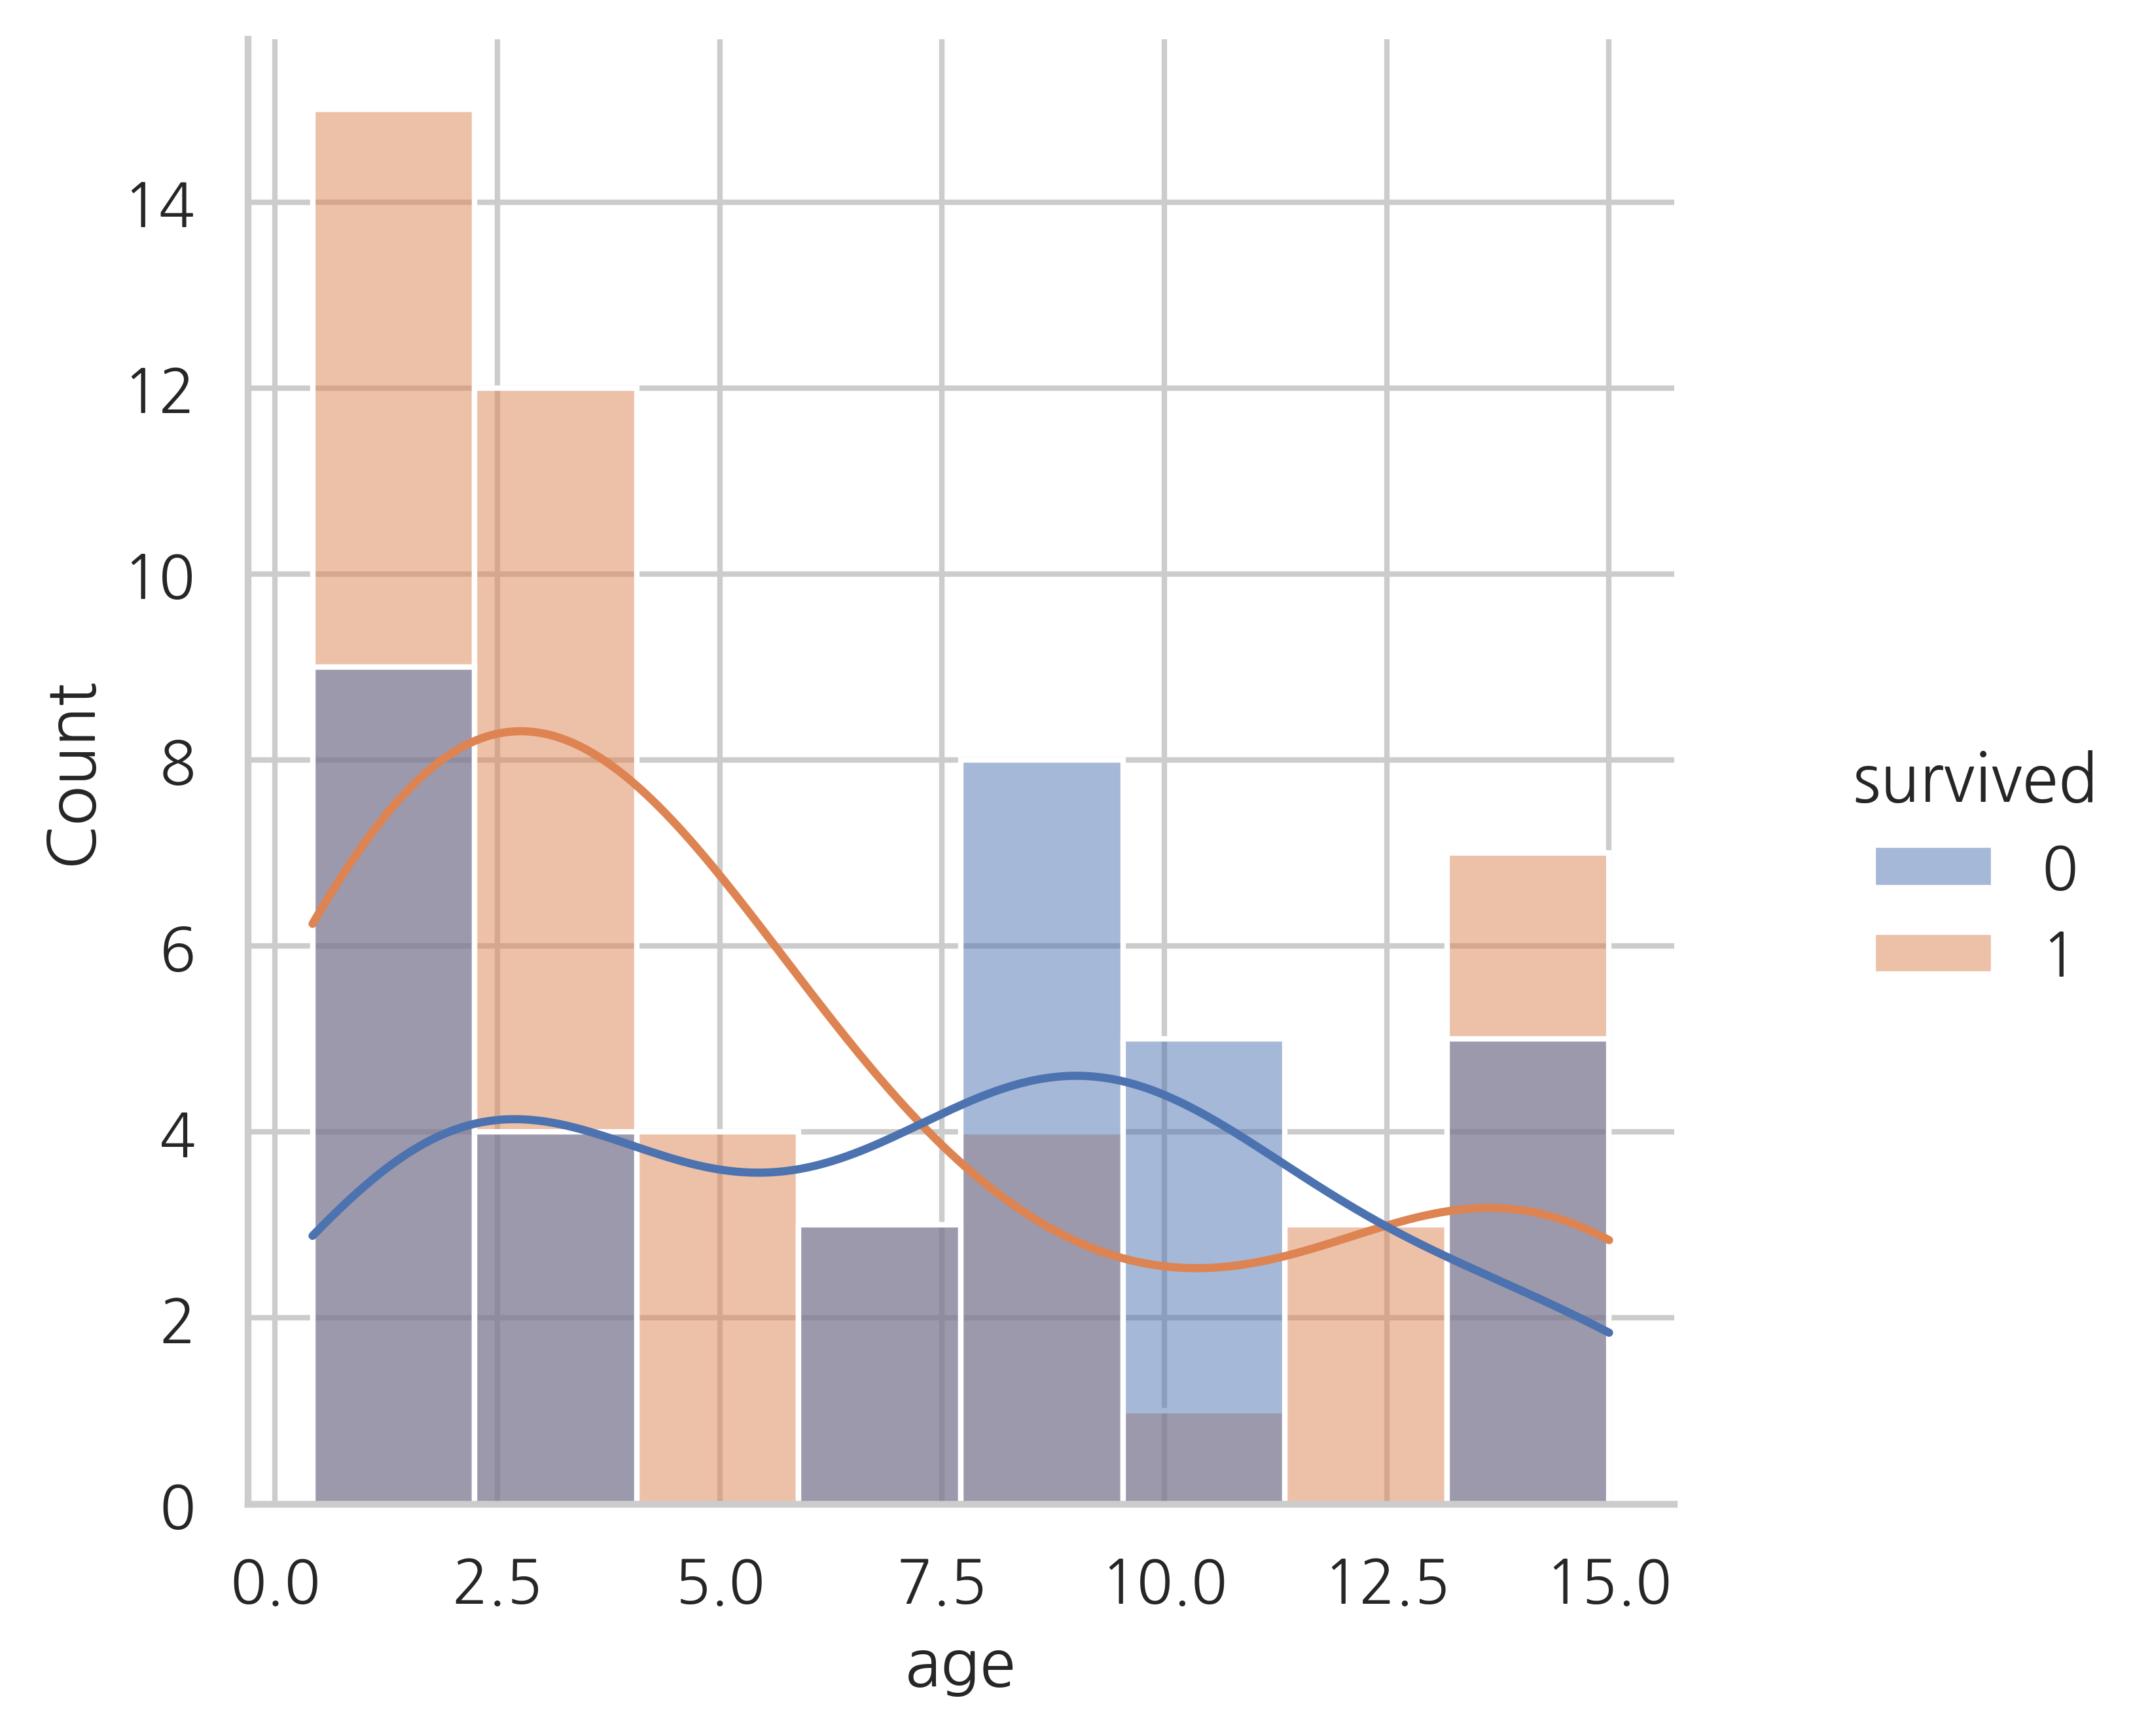

In [19]:
# child_df에서 survived별 age를 displot으로 나타냄. (seaborn 사용)
sns.displot(x='age', hue='survived', data=child_df, kde=True)

In [ ]:
# 1/age의 제곱근(분자:1, 분모:age의 제곱근)에 해당하는 값을 child_df의 age_weight 이라는 열로 추가 (lambda와 apply 사용. 제곱근의 경우 numpy를 이용해 구할 수 있음)
child_df['age_weight']=child_df.age.apply(lambda x: np.sqrt(1/x))
# 추가한 후 child_df의 앞의 5개행만 확인 
child_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,survived,sex,age,fare,class,who,age_weight
0,0,male,2.00,21.0750,Third,child,0.707107
1,1,female,14.00,30.0708,Second,child,0.267261
2,1,female,4.00,16.7000,Third,child,0.500000
3,0,female,14.00,7.8542,Third,child,0.267261
4,0,male,2.00,29.1250,Third,child,0.707107
...,...,...,...,...,...,...,...
78,1,male,0.83,18.7500,Second,child,1.097643
79,0,male,4.00,31.2750,Third,child,0.500000
80,0,female,9.00,15.2458,Third,child,0.333333
81,1,male,4.00,11.1333,Third,child,0.500000


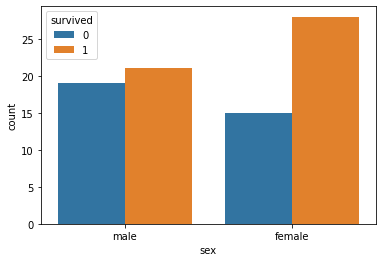

In [ ]:
# child_df에서 sex 변수별 survived한 아이들의 수 count하여 시각화 (seaborn 사용) 
sns.countplot(x='sex',hue='survived' ,data=child_df)

In [ ]:
# child_df에서 sex가 female인 경우 0.3, male인 경우 0을 값으로 갖는 female_weight(list) 구하기 (list comprehension 사용.)
female_weight = [0.3 if sex == 'female' else 0 for sex in child_df['sex']]
# female_weight을 child_df의 female_weight 이라는 열로 추가 
child_df['female_weight']=female_weight
# 추가한 후 child_df의 앞의 5개행만 확인 
child_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,survived,sex,age,fare,class,who,age_weight,female_weight
0,0,male,2.0,21.0750,Third,child,0.707107,0.0
1,1,female,14.0,30.0708,Second,child,0.267261,0.3
2,1,female,4.0,16.7000,Third,child,0.500000,0.3
3,0,female,14.0,7.8542,Third,child,0.267261,0.3
4,0,male,2.0,29.1250,Third,child,0.707107,0.0


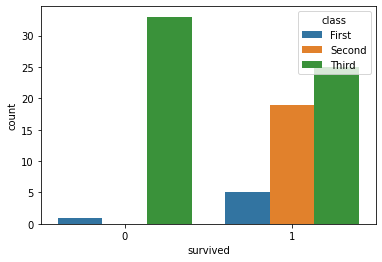

In [ ]:
# child_df에서 class 변수별 survived한 아이들의 수 count하여 시각화 (seaborn 사용) 
# sns.countplot(x='class',hue='survived' ,data=child_df)
sns.countplot(x='survived',hue='class' ,data=child_df)

In [ ]:
# child_df에서 class가 Second인 경우 0.5, First인 경우 0.2, Third인 경우 0을 값으로 갖는 class_weight(list) 구하기
class_weight = [ 0.5 if x=='Second' else 0.2 if x=='First' else 0 for x in child_df['class'] ]
# class_weight을 child_df의 class_weight 이라는 열로 추가 
child_df['class_weight'] = class_weight 
# 추가한 후 child_df의 앞의 5개행만 확인 
child_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,survived,sex,age,fare,class,who,age_weight,female_weight,class_weight,class_weight
0,0,male,2.0,21.0750,Third,child,0.707107,0.0,0.0,0.0
1,1,female,14.0,30.0708,Second,child,0.267261,0.3,0.5,0.5
2,1,female,4.0,16.7000,Third,child,0.500000,0.3,0.0,0.0
3,0,female,14.0,7.8542,Third,child,0.267261,0.3,0.0,0.0
4,0,male,2.0,29.1250,Third,child,0.707107,0.0,0.0,0.0


In [ ]:
# 위에서 구한 age_weight과 female_weight, class_weight을 합친 값을 child_df의 score 이라는 열로 추가
child_df['score'] = child_df.age_weight + child_df.female_weight + child_df.class_weight
# 추가한 후 child_df의 앞의 5개행만 확인 
child_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,survived,sex,age,fare,class,who,age_weight,female_weight,class_weight,class_weight,score
0,0,male,2.0,21.0750,Third,child,0.707107,0.0,0.0,0.0,0.707107
1,1,female,14.0,30.0708,Second,child,0.267261,0.3,0.5,0.5,1.067261
2,1,female,4.0,16.7000,Third,child,0.500000,0.3,0.0,0.0,0.800000
3,0,female,14.0,7.8542,Third,child,0.267261,0.3,0.0,0.0,0.567261
4,0,male,2.0,29.1250,Third,child,0.707107,0.0,0.0,0.0,0.707107


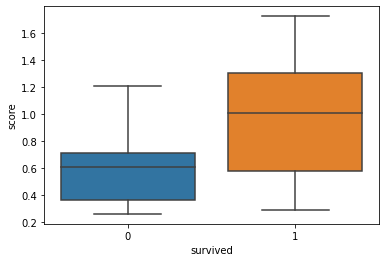

In [ ]:
# survived 변수별 score값의 분포를 boxplot으로 시각화 (seaborn 사용) 
sns.boxplot( x='survived' , y='score', data=child_df)